In [27]:
import ultralytics
# ultralytics.checks()

In [28]:
from ultralytics import YOLO

In [29]:
# Load a model
model = YOLO("yolo11m-pose.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

In [30]:
# Predict with the model
results = model.predict("../data_v1/Correct_n2_3_7_100/52723_8_4.jpg", show = True)  # predict on an image

# Access the results
for result in results:
    xy = result.keypoints.xy  # x and y coordinates
    xyn = result.keypoints.xyn  # normalized
    kpts = result.keypoints.data  # x, y, visibility (if available)


image 1/1 c:\Users\UDESIAS\Documents\FYP\Fine-Tune\yolopose_v1\..\data_v1\Correct_n2_3_7_100\52723_8_4.jpg: 640x448 2 persons, 279.5ms
Speed: 1.6ms preprocess, 279.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


In [31]:
# Plot the results
# results[0].plot()

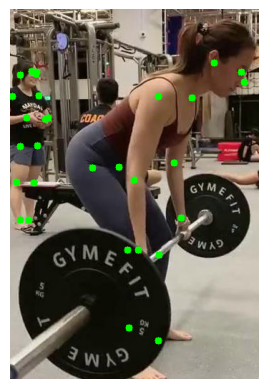

In [34]:
import cv2
import numpy as np

# Load the original image
image_path = result.orig_img
image = cv2.imread("52723_8_4.jpg")

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw keypoints on the image
for person in xy:
    for point in person:
        x, y = int(point[0]), int(point[1])
        if x > 0 and y > 0:  # Only draw valid points
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Display the image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()